# DSE 200 FINAL PROJECT
## Fall 2022
### Due Date:  December 2nd, 2022

#### Author of the notebook - Vaaruni Desai

The final project is comprised of two parts: 
* <b>Part I</b> is a set of coding questions that require the _numpy_ library to analyze the provided dataset.  
* <b>Part II</b> is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _IO_, _pandas_, _matplotlib_ and _sci-kit-learn_ libraries.  

<b>Deliverables</b>: Submit both parts as one notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for Part II and reproduce your results. The notebook should be organized with a clear table of contents on top _(see example in the Pylaski notebook at https://github.com/words-sdsc/wifire/blob/master/pylaski.ipynb)_ and links to the parts/steps outlined. Don't forget to add your name on top as the author of the notebook. 

Table of Contents 

1. <a href='#P1'>Part One</a>
2. <a href='#P2'>Part Two</a>
    1. <a href='#P21'>Find a dataset or datasets</a>
        1. <a href='#P211'>Flight Delay Prediction based on Weather Conditions</a>
    2. <a href='#P22'>Explore the datasets</a>
        1. <a href='#P221'>DataFrame Overview</a>
        2. <a href='#P222'>Observations and next steps</a>
        3. <a href='#P223'>About merging data</a>
        4. <a href='#P224'>Approach 1</a>
        5. <a href='#P225'>Approach 2</a>
        6. <a href='#P226'>Analysis using visualization libraries</a>
    3. <a href='#P23'>Identify 1-3 research questions and perform analysis</a>
        1. <a href='#P231'>Research Questions</a>
        2. <a href='#Q1'>Addressing the 1st question</a>
        3. <a href='#Q2'>Are delayed flights seasonal?</a>
        4. <a href='#Q3'>Studying impact of higher latitude on flight delays</a>
        5. <a href='#Q4'>How well can flight delays be predicted purely based on weather?</a>
    4. <a href='#P24'>Present your findings</a>

<a id='P1'></a>
# PART I: 20%

### Preliminaries

In [1]:
import numpy as np

<a id='P11'></a>
### 1.1 Preliminaries

Use numpy to load `prostate_cancer.npy` into a numpy matrix. Print the dataset's shape and the first 5 rows.<br>

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [2]:
# For reference
column_names = ['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
                'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
diagnosis_encoding = {'Benign': 0, 'Malignant': 1}

In [3]:
# Load data
data = np.load('prostate_cancer.npy', allow_pickle=True)

# Your code here
print(f"Dataset's shape : {data.shape}\n")

print(f"First 5 rows of the matrix :\n\n{data[:5]}")

Dataset's shape : (100, 10)

First 5 rows of the matrix :

[[1 'M' 23 12 151 954 0.143 0.278 0.242 0.079]
 [2 'B' 9 13 133 1326 0.143 0.079 0.181 0.057]
 [3 'M' 21 27 130 1203 0.125 0.16 0.207 0.06]
 [4 'M' 14 16 78 386 0.07 0.284 0.26 0.097]
 [5 'M' 9 19 135 1297 0.141 0.133 0.181 0.059]]


<a id='P12'></a>
### 1.2  Transformations

* The first column is the id of the patient, which isn't relevant for our purposes. Remove that column from the matrix by creating a new matrix composed of the rest of the columns.
* The second column is the `diagnosis_result` i.e. **M** for malignant and **B** for benign. Replace **M** with `1` and **B** with `0`
* Convert the `dtype` of the resulting array to `np.float64`
* As usual, print the shape of the resulting dataset and the first 5 rows.

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [4]:
new_mat = data[:,1:]
new_mat[:,0] = np.where(new_mat[:,0] == 'M', 1, 0)

In [5]:
new_mat = new_mat.astype('float64')

In [6]:
print(f"Dataset's shape : {new_mat.shape}\n")

print(f"First 5 rows of the matrix :\n\n{new_mat[:5]}")

Dataset's shape : (100, 9)

First 5 rows of the matrix :

[[1.000e+00 2.300e+01 1.200e+01 1.510e+02 9.540e+02 1.430e-01 2.780e-01
  2.420e-01 7.900e-02]
 [0.000e+00 9.000e+00 1.300e+01 1.330e+02 1.326e+03 1.430e-01 7.900e-02
  1.810e-01 5.700e-02]
 [1.000e+00 2.100e+01 2.700e+01 1.300e+02 1.203e+03 1.250e-01 1.600e-01
  2.070e-01 6.000e-02]
 [1.000e+00 1.400e+01 1.600e+01 7.800e+01 3.860e+02 7.000e-02 2.840e-01
  2.600e-01 9.700e-02]
 [1.000e+00 9.000e+00 1.900e+01 1.350e+02 1.297e+03 1.410e-01 1.330e-01
  1.810e-01 5.900e-02]]


<a id='P13'></a>
### 1.3 Summary Statistics

**a)** Print the means and standard deviations of each column

**Output required**: 
<ul>
    <li>Floats representing the mean of each column</li>
    <li>Floats representing the standard deviation of each column</li>
</ul>

In [7]:
print(f"Mean of each column :\n\n{new_mat.mean(axis = 0)}\n\n")
print(f"Standard deviation of each column :\n\n{new_mat.std(axis = 0)}\n\n")

Mean of each column :

[6.2000e-01 1.6850e+01 1.8230e+01 9.6780e+01 7.0288e+02 1.0273e-01
 1.2670e-01 1.9317e-01 6.4690e-02]


Standard deviation of each column :

[4.85386444e-01 4.85463696e+00 5.16692365e+00 2.35574107e+01
 3.18108324e+02 1.45683596e-02 6.08370775e-02 3.06307215e-02
 8.11011097e-03]




**b)** Print the minimum and maximum values of each column

**Output required**: 
<ul>
    <li>Floats representing the minimum value found in each column</li>
    <li>Floats representing the maximum value found in each column</li>
</ul>

In [8]:
print(f"Minimum value found in each column:\n\n{new_mat.min(axis = 0)}\n\n")
print(f"Maximum value found in each column :\n\n{new_mat.max(axis = 0)}\n\n")

Minimum value found in each column:

[0.00e+00 9.00e+00 1.10e+01 5.20e+01 2.02e+02 7.00e-02 3.80e-02 1.35e-01
 5.30e-02]


Maximum value found in each column :

[1.000e+00 2.500e+01 2.700e+01 1.720e+02 1.878e+03 1.430e-01 3.450e-01
 3.040e-01 9.700e-02]




**c)** Calculate the `diagnosis_result`-wise means and standard deviations.<br>
**Report these values with respect to the actual *name* of the result, for which you must refer to 1.1**

**Output required**: 
<ul>
    <li>For each of the 2 results in the dataset:<ul>
        <li>Floats representing the standard deviation of each column for this result</li>
        <li>Floats representing the mean of each column for this result</li>
</ul>

In [9]:
Bmeandict = {}
for col, val in zip(column_names[1:],new_mat[new_mat[:,0]==0].mean(axis=0)):
    Bmeandict[col] = val
Bstddict =  {}
for col, val in zip(column_names[1:],new_mat[new_mat[:,0]==0].std(axis=0)):
    Bstddict[col] = val
Mmeandict = {}
for col, val in zip(column_names[1:],new_mat[new_mat[:,0]==1].mean(axis=0)):
    Mmeandict[col] = val
Mstddict = {}
for col, val in zip(column_names[1:],new_mat[new_mat[:,0]==0].std(axis=0)):
    Mstddict[col] = val

BDict = {'mean':Bmeandict,'std':Bstddict}
MDict = {'mean':Mmeandict,'std':Mstddict}

diagnosis_dict = {'Benign':BDict, 'Malignant':MDict}

diagnosis_dict

{'Benign': {'mean': {'diagnosis_result': 0.0,
   'radius': 17.94736842105263,
   'texture': 17.763157894736842,
   'perimeter': 78.5,
   'area': 474.3421052631579,
   'smoothness': 0.09905263157894735,
   'compactness': 0.08689473684210526,
   'symmetry': 0.18405263157894733,
   'fractal_dimension': 0.06460526315789474},
  'std': {'diagnosis_result': 0.0,
   'radius': 4.994456761045203,
   'texture': 5.116712608935318,
   'perimeter': 17.24704398776177,
   'area': 216.69494399607618,
   'smoothness': 0.014992888434224678,
   'compactness': 0.04188756219972716,
   'symmetry': 0.02957412397458741,
   'fractal_dimension': 0.007706932879195987}},
 'Malignant': {'mean': {'diagnosis_result': 1.0,
   'radius': 16.177419354838708,
   'texture': 18.516129032258064,
   'perimeter': 107.98387096774194,
   'area': 842.9516129032259,
   'smoothness': 0.10498387096774195,
   'compactness': 0.1510967741935484,
   'symmetry': 0.19875806451612907,
   'fractal_dimension': 0.06474193548387099},
  'std': 

<a id='P2'></a>
# PART II : 80%

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.

There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

<a id='P21'></a>
## Step 1: Find a dataset or datasets

Based on your interest, identify a dataset which you will want to examine.  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about. 
 

This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask. You are expected to use at least two interconnected datasets, e.g., two tables in one database or a combination of datasets which you can merge in some meaningful way.


In [100]:
#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION

<a id='P211'></a>
### Flight Delay Prediction based on Weather Conditions

[RAW DATA](https://ucsdcloud-my.sharepoint.com/:f:/g/personal/v1desai_ucsd_edu/EitHpvb0fQhBryAG1Negp4kBQjjTpqp2FKFGBqq_O8oNHQ?e=zLQXVz) |
[DATA USED FOR ANALYSIS](https://ucsdcloud-my.sharepoint.com/:f:/g/personal/v1desai_ucsd_edu/En5YXRhf139Csfzb6i9Us5oBNOVHchlwSzp17KV959-rjQ?e=AXlsRw)


* *After coming across various datasets, I got very interested in On-time flight performance data that I found on https://www.bts.gov/. While going through this data, Weather_Delay caught my interest, mainly because I had already seen the Weather related data on https://www.ncei.noaa.gov/.*
* *Scanning documents, data documentation, reading several papers about similar issues gave me this idea to combine them. After cleaning and data preprocessing, I got curious about how this data can also be affected by geographical location. That is when I got location data from [Kaggle](https://www.kaggle.com/datasets/aravindram11/list-of-us-airports)*
* *All three datasets are openly available to public*
* *Scope of this project is limited to the year 2019 and to the top 10 most frequently used International airports in California as it was undisturbed from COVID and geo-political situations*



* *Data used for analysis was curated by me. Raw data is [here](https://ucsdcloud-my.sharepoint.com/:f:/g/personal/v1desai_ucsd_edu/EitHpvb0fQhBryAG1Negp4kBQjjTpqp2FKFGBqq_O8oNHQ?e=zLQXVz)*
* *[BTS.gov](https://transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr) **(Link to publicly available data)** has a systematic procedure to download files. First select the features that your research needs and select the timeline, carrier, airport based on the goal of the project*
* *[NCEI.gov](https://www.ncdc.noaa.gov/cdo-web/datatools/lcd) **(Link to publicly available data)** has a system where only one station data can be added to cart. Then required file type can be selected. It also has a limit on how many station years a consumer can download on one click*
* *Data for locations was easily available on kaggle*

* **How [curated data](https://ucsdcloud-my.sharepoint.com/:f:/g/personal/v1desai_ucsd_edu/En5YXRhf139Csfzb6i9Us5oBNOVHchlwSzp17KV959-rjQ?e=AXlsRw) was curated?**

    * Weather data - Each station data was loaded using pandas and then concatenated to get one big file. The datetime format was changed using ***fromisoformat*** method
    * Weather data had station numbers instead of airports. Had to convert them manually as there was no exact matching data

* **Information before proceeding**

    * *Weather Delays are mostly extreme weather delays that cannot be avoided*
    * *NAS delays include Weather delays. Infact, according to BTS.gov, in 2019, 56% of Nas Delays were caused by weather. So let's make a column that has 56% of Nas Delays**  <a href='#I1'>(See below picture)</a>
    * *If a flight is delayed more than 15 mins, then passengers should be notified about it*
    * *For prediction purposes, I will be considering both Weather and NAS Delays*

<a id='I1'></a> 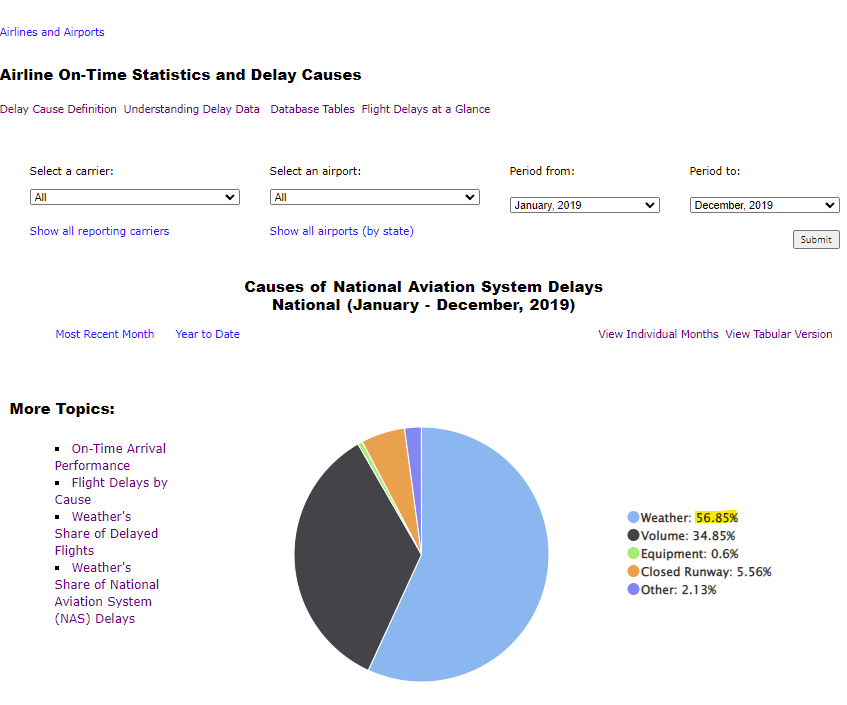

#### **Importing required libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from datetime import time as time
from datetime import timedelta as td
from sklearn.linear_model import LinearRegression, Ridge,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from math import sqrt
from scipy import stats

#### **Reading data from csv files**

***Inorder to read all possible columns in one row***

In [12]:
pd.set_option('display.max_columns', None)

***Reading the csv files***

In [13]:
columns_to_read = ['YEAR','MONTH','DAY_OF_MONTH','MKT_UNIQUE_CARRIER','OP_CARRIER_FL_NUM','ORIGIN','DEST','CRS_DEP_TIME','DEP_TIME','DEP_DELAY','CRS_ARR_TIME','ARR_TIME','ARR_DELAY','AIR_TIME','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME']

In [14]:
columns_to_read_loc = ['IATA','LATITUDE', 'LONGITUDE']

In [15]:
Jan = pd.read_csv('Project/Jan2019.csv', usecols = columns_to_read)
Feb = pd.read_csv('Project/Feb2019.csv', usecols = columns_to_read)
Mar = pd.read_csv('Project/Mar2019.csv', usecols = columns_to_read)
Apr = pd.read_csv('Project/Apr2019.csv', usecols = columns_to_read)
May = pd.read_csv('Project/May2019.csv', usecols = columns_to_read)
Jun = pd.read_csv('Project/Jun2019.csv', usecols = columns_to_read)
Jul = pd.read_csv('Project/Jul2019.csv', usecols = columns_to_read)
Aug = pd.read_csv('Project/Aug2019.csv', usecols = columns_to_read)
Sep = pd.read_csv('Project/Sep2019.csv', usecols = columns_to_read)
Oct = pd.read_csv('Project/Oct2019.csv', usecols = columns_to_read)
Nov = pd.read_csv('Project/Nov2019.csv', usecols = columns_to_read)
Dec = pd.read_csv('Project/Dec2019.csv', usecols = columns_to_read)
loc_df = pd.read_csv('Project/airports.csv', usecols = columns_to_read_loc)
weather_df = pd.read_csv('Project/weather.csv')

***Renaming columns for representation purposes and creating flight_date for future use***

In [16]:
flights_data = pd.concat([Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec])
flights_data.reset_index(drop = True, inplace = True)
columns_to_rename = {'YEAR':'Year','MONTH':'Month','DAY_OF_MONTH':'Day','MKT_UNIQUE_CARRIER':'Carrier_Name','OP_CARRIER_FL_NUM':'Flight_Number','ORIGIN':'Origin_Airport','DEST':'Dest_Airport','CRS_DEP_TIME':'Scheduled_Dep_Time','DEP_TIME':'Dep_Time','DEP_DELAY':'Dep_Delay','CRS_ARR_TIME':'Scheduled_Arr_Time','ARR_TIME':'Arr_Time','ARR_DELAY':'Arr_Delay','AIR_TIME':'In_Air_Time','CARRIER_DELAY':'Carrier_Delay','WEATHER_DELAY':'Weather_Delay','NAS_DELAY':'Nas_Delay','SECURITY_DELAY':'Security_Delay','LATE_AIRCRAFT_DELAY':'Late_Aircraft_Delay','CRS_ELAPSED_TIME':'Scheduled_Elapsed_Mins','ACTUAL_ELAPSED_TIME':'Actual_Elapsed_Mins'}
flights_data.rename(columns = columns_to_rename, inplace = True) 

In [17]:
flights_data['Flight_Date'] = flights_data.apply(lambda row : dt(row['Year'],row['Month'],row['Day']).date(),axis =1)

<a id='P22'></a>
## Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized. You’ll need to determine what common features allow you to merge the datasets.  

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

You are also expected to use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

In [18]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

<a id='P221'></a>
***Checking what the data in each DataFrame looks like and then checking the data types of each column and number of nulls in each column***

### **flights_data**

In [19]:
flights_data.head(5)

Year  Month  Day Carrier_Name  Flight_Number Origin_Airport Dest_Airport  \
0  2019      1    6           DL           5350            IND          JFK   
1  2019      1    7           DL           5350            IND          JFK   
2  2019      1    8           DL           5350            IND          JFK   
3  2019      1    9           DL           5350            IND          JFK   
4  2019      1   10           DL           5350            IND          JFK   

   Scheduled_Dep_Time  Dep_Time  Dep_Delay  Scheduled_Arr_Time  Arr_Time  \
0                1154    1154.0        0.0                1401    1340.0   
1                1154    1149.0       -5.0                1401    1334.0   
2                1154    1149.0       -5.0                1401    1343.0   
3                1154    1147.0       -7.0                1401    1401.0   
4                1154    1148.0       -6.0                1401    1354.0   

   Arr_Delay  Scheduled_Elapsed_Mins  Actual_Elapsed_Mins  In_Air_Time  \
0      -21.0                   127.0                106.0         88.0   
1      -27.0                   127.0                105.0         87.0   
2      -18.0                   127.0                114.0         95.0   
3        0.0                   127.0                134.0         98.0   
4       -7.0                   127.0                126.0        102.0   

   Carrier_Delay  Weather_Delay  Nas_Delay  Security_Delay  \
0            NaN            NaN        NaN             NaN   
1            NaN            NaN        NaN             NaN   
2            NaN            NaN        NaN             NaN   
3            NaN            NaN        NaN             NaN   
4            NaN            NaN        NaN             NaN   

   Late_Aircraft_Delay Flight_Date  
0                  NaN  2019-01-06  
1                  NaN  2019-01-07  
2                  NaN  2019-01-08  
3                  NaN  2019-01-09  
4                  NaN  2019-01-10

In [20]:
print('flights_data Dataframe Shape:', flights_data.shape)
df_info=pd.DataFrame(flights_data.dtypes).T.rename(index={0:'column type'})
df_info=pd.concat([df_info,pd.DataFrame(flights_data.isnull().sum()).T.rename(index={0:'Number of nulls'})])
df_info=pd.concat([df_info,pd.DataFrame(flights_data.isnull().sum()/flights_data.shape[0]*100).T.rename(index={0:'% of nulls'})])
df_info

flights_data Dataframe Shape: (8091684, 22)


Year  Month    Day Carrier_Name Flight_Number  \
column type      int64  int64  int64       object         int64   
Number of nulls      0      0      0            0             0   
% of nulls         0.0    0.0    0.0          0.0           0.0   

                Origin_Airport Dest_Airport Scheduled_Dep_Time  Dep_Time  \
column type             object       object              int64   float64   
Number of nulls              0            0                  0    147894   
% of nulls                 0.0          0.0                0.0  1.827728   

                Dep_Delay Scheduled_Arr_Time  Arr_Time Arr_Delay  \
column type       float64              int64   float64   float64   
Number of nulls    147918                  0    156916    174420   
% of nulls       1.828025                0.0  1.939226  2.155546   

                Scheduled_Elapsed_Mins Actual_Elapsed_Mins In_Air_Time  \
column type                    float64             float64     float64   
Number of nulls                     10              174420      174420   
% of nulls                    0.000124            2.155546    2.155546   

                Carrier_Delay Weather_Delay  Nas_Delay Security_Delay  \
column type           float64       float64    float64        float64   
Number of nulls       6564229       6564229    6564229        6564229   
% of nulls          81.123151     81.123151  81.123151      81.123151   

                Late_Aircraft_Delay Flight_Date  
column type                 float64      object  
Number of nulls             6564229           0  
% of nulls                81.123151         0.0

### **weather_df**

In [21]:
weather_df.head(5)

Airport                 Date  HourlyDryBulbTemperature  HourlyPrecipitation  \
0     PHL  2019-01-01 00:12:00                      51.0                 0.02   
1     DTW  2019-01-01 00:14:00                      40.0                  NaN   
2     DTW  2019-01-01 00:40:00                      38.0                  NaN   
3     EWR  2019-01-01 00:51:00                      46.0                 0.04   
4     DEN  2019-01-01 00:53:00                      -1.0                 0.00   

   HourlyStationPressure  HourlyVisibility  HourlyWindSpeed  
0                  29.76               8.0              9.0  
1                  28.89               4.0             16.0  
2                  28.94               3.0             13.0  
3                  29.72               3.0              0.0  
4                  24.72              10.0              8.0

In [22]:
print('weather_df Dataframe Shape:', weather_df.shape)
df_info=pd.DataFrame(weather_df.dtypes).T.rename(index={0:'column type'})
df_info=pd.concat([df_info,pd.DataFrame(weather_df.isnull().sum()).T.rename(index={0:'Number of nulls'})])
df_info=pd.concat([df_info,pd.DataFrame(weather_df.isnull().sum()/weather_df.shape[0]*100).T.rename(index={0:'% of nulls'})])
df_info

weather_df Dataframe Shape: (177397, 7)


Airport    Date HourlyDryBulbTemperature HourlyPrecipitation  \
column type      object  object                  float64             float64   
Number of nulls       0       0                      170               15859   
% of nulls          0.0     0.0                  0.09583            8.939836   

                HourlyStationPressure HourlyVisibility HourlyWindSpeed  
column type                   float64          float64         float64  
Number of nulls                    22              713              18  
% of nulls                   0.012402         0.401923        0.010147

### **loc_df**

In [23]:
loc_df.head(5)

IATA   LATITUDE   LONGITUDE
0  ABQ  35.040222 -106.609194
1  ANC  61.174320 -149.996186
2  ATL  33.640444  -84.426944
3  AUS  30.194533  -97.669872
4  BDL  41.938874  -72.683228

In [24]:
print('loc_df Dataframe Shape:', loc_df.shape)
df_info=pd.DataFrame(loc_df.dtypes).T.rename(index={0:'column type'})
df_info=pd.concat([df_info,pd.DataFrame(loc_df.isnull().sum()).T.rename(index={0:'Number of nulls'})])
df_info=pd.concat([df_info,pd.DataFrame(loc_df.isnull().sum()/loc_df.shape[0]*100).T.rename(index={0:'% of nulls'})])
df_info

loc_df Dataframe Shape: (341, 3)


IATA LATITUDE LONGITUDE
column type      object  float64   float64
Number of nulls       0        0         0
% of nulls          0.0      0.0       0.0

<a id='P222'></a>
### Observations and next steps
* After going through the features of each dataset, we can observe that flights_data has 81% of nulls in each of the Delay columns
* Since the project is about Flights Delay prediction based on Weather Data, it makes sense to get rid of data where these delays are not recorded
* weather_df has negligible number of nulls in every column except HourlyPrecipitation
* We'll be dropping nulls from weather_df as well and resetting the index for both flights_data and weather_df
* loc_df has no nulls

* We'll change the columns of loc_df for representation purposes

In [25]:
flights_data = flights_data.dropna()
flights_data.reset_index(drop = True, inplace = True)

In [26]:
weather_df = weather_df.dropna()
weather_df.reset_index(drop = True, inplace = True)

In [27]:
loc_df.columns = ['Airport', 'Latitude', 'Longitude']

<a id='P223'></a>
### **About merging data:**
* flights_data and weather_df can be merged based on Origin_Airport and Airport columns respectively. Then they can be sorted using Schedule_Dep_Time and Date columns
* But date formats in both don't match
* We first convert the date formats in flights_data to match the date format in weather_df
* Since the scope of this project is limited to the top 10 most frequently used International airports in California, we filter the data to obtain a subset of data where top 10 most frequently used International airports in California are the Dest_Airport
* Once all data is merged, we drop all nulls in order to get our final dataset

In [28]:
def combine_date_and_time(x,y):
    if x == 2400:
        x = 0
    x = pd.to_datetime(str(x).zfill(4), format="%H%M", errors='coerce').time()
    return dt.combine(y,x)
    
def create_flight_time(df, col1, col2):    
    lis = []
    for index, cols in df[[col1, col2]].iterrows():    
        if pd.isnull(cols[0]):
            lis.append(np.nan)
        else:
            lis.append(cols[0] + td(minutes=cols[1]))
    return pd.Series(lis)

def to_combine(x):
    x = int(x)
    if x == 2400:
        return 0
    else:
        return x

In [29]:
flights_data['Scheduled_Dep_Time'] = flights_data.apply(lambda row : combine_date_and_time(row['Scheduled_Dep_Time'],row['Flight_Date']), axis = 1)

In [30]:
flights_data['Scheduled_Arr_Time'] = flights_data.apply(lambda row : combine_date_and_time(row['Scheduled_Arr_Time'],row['Flight_Date']), axis = 1)

In [31]:
flights_data['Scheduled_Arr_Time'] = create_flight_time(flights_data, 'Scheduled_Arr_Time','Scheduled_Elapsed_Mins')

In [32]:
flights_data['Dep_Time'] =  create_flight_time(flights_data, 'Scheduled_Dep_Time','Dep_Delay')

In [33]:
flights_data['Arr_Time'] =  create_flight_time(flights_data, 'Scheduled_Arr_Time','Arr_Delay')

In [34]:
weather_df['Date'] = weather_df.apply(lambda row : pd.to_datetime(row['Date'],format="%Y-%m-%d %H:%M:%S", errors='coerce'), axis = 1)

**Selecting the top ten most frequently used International airports in California**

In [35]:
top_airports = ['SFO','LAX','SAN','SNA','SMF','SJC','BUR','OAK','ONT','SBP']

In [36]:
flights_data = flights_data[flights_data['Dest_Airport'].isin(top_airports)]

**Sorting and resetting index pre-merge**

In [37]:
flights_data.sort_values(by=['Scheduled_Dep_Time'], inplace = True)
flights_data.reset_index(drop = True,inplace = True)

In [38]:
weather_df.sort_values(by=['Date'], inplace = True)
weather_df.reset_index(drop = True,inplace = True)

<a id='P224'></a>
#### **Approach 1 : At first my approach to merging data was to merge flights data and weather data together on Origin_Airport and then filter them by finding rows where weather-recorded datetime fell between (Scheduled Departure time-15 mins) and Departure time**

* This approach left me with huge chunk of data that was not usable for further use
* I had to filter out data inorder to even merge 
* Coded like below
* Caused RAM overflow and memory problems

(Next 4 cells are Markdown cells. Running them as code will result in the kernel restarting)

df = pd.merge(flights_data,weather_df,left_on='Origin_Airport', right_on = 'Airport')

df = df[(df.Date >= df.Schedule_Dep_Time+buffer)&(df.Date <= df.Dep_Time)]

df = df.merge(loc_df, left_on = 'Origin_Airport', right_on = 'Airport')

df = df.merge(loc_df, left_on = 'Dest_Airport', right_on = 'Airport')

<a id='P225'></a>
#### **Approach 2 (Improved approach) : Used merge_asof method instead of merge where I had the option to merge data based on conditions**

In [39]:
data = pd.merge_asof(flights_data,weather_df,left_on='Scheduled_Dep_Time', right_on = 'Date', left_by = 'Origin_Airport', right_by = 'Airport')

In [40]:
data = data.dropna()
data.reset_index(drop = True,inplace = True)

In [41]:
data = data.merge(loc_df, left_on = 'Origin_Airport', right_on = 'Airport')

In [42]:
data = data.merge(loc_df, left_on = 'Dest_Airport', right_on = 'Airport')

* Dropping the Airport columns that are unnecessary

In [43]:
data.drop(labels = ['Airport','Airport_x','Airport_y'], axis = 1, inplace = True)

<a id='P226'></a>
### **Analysis using visualization libraries**

#### Pairplot : to understand the best set of features to explain a relationship between two variables 

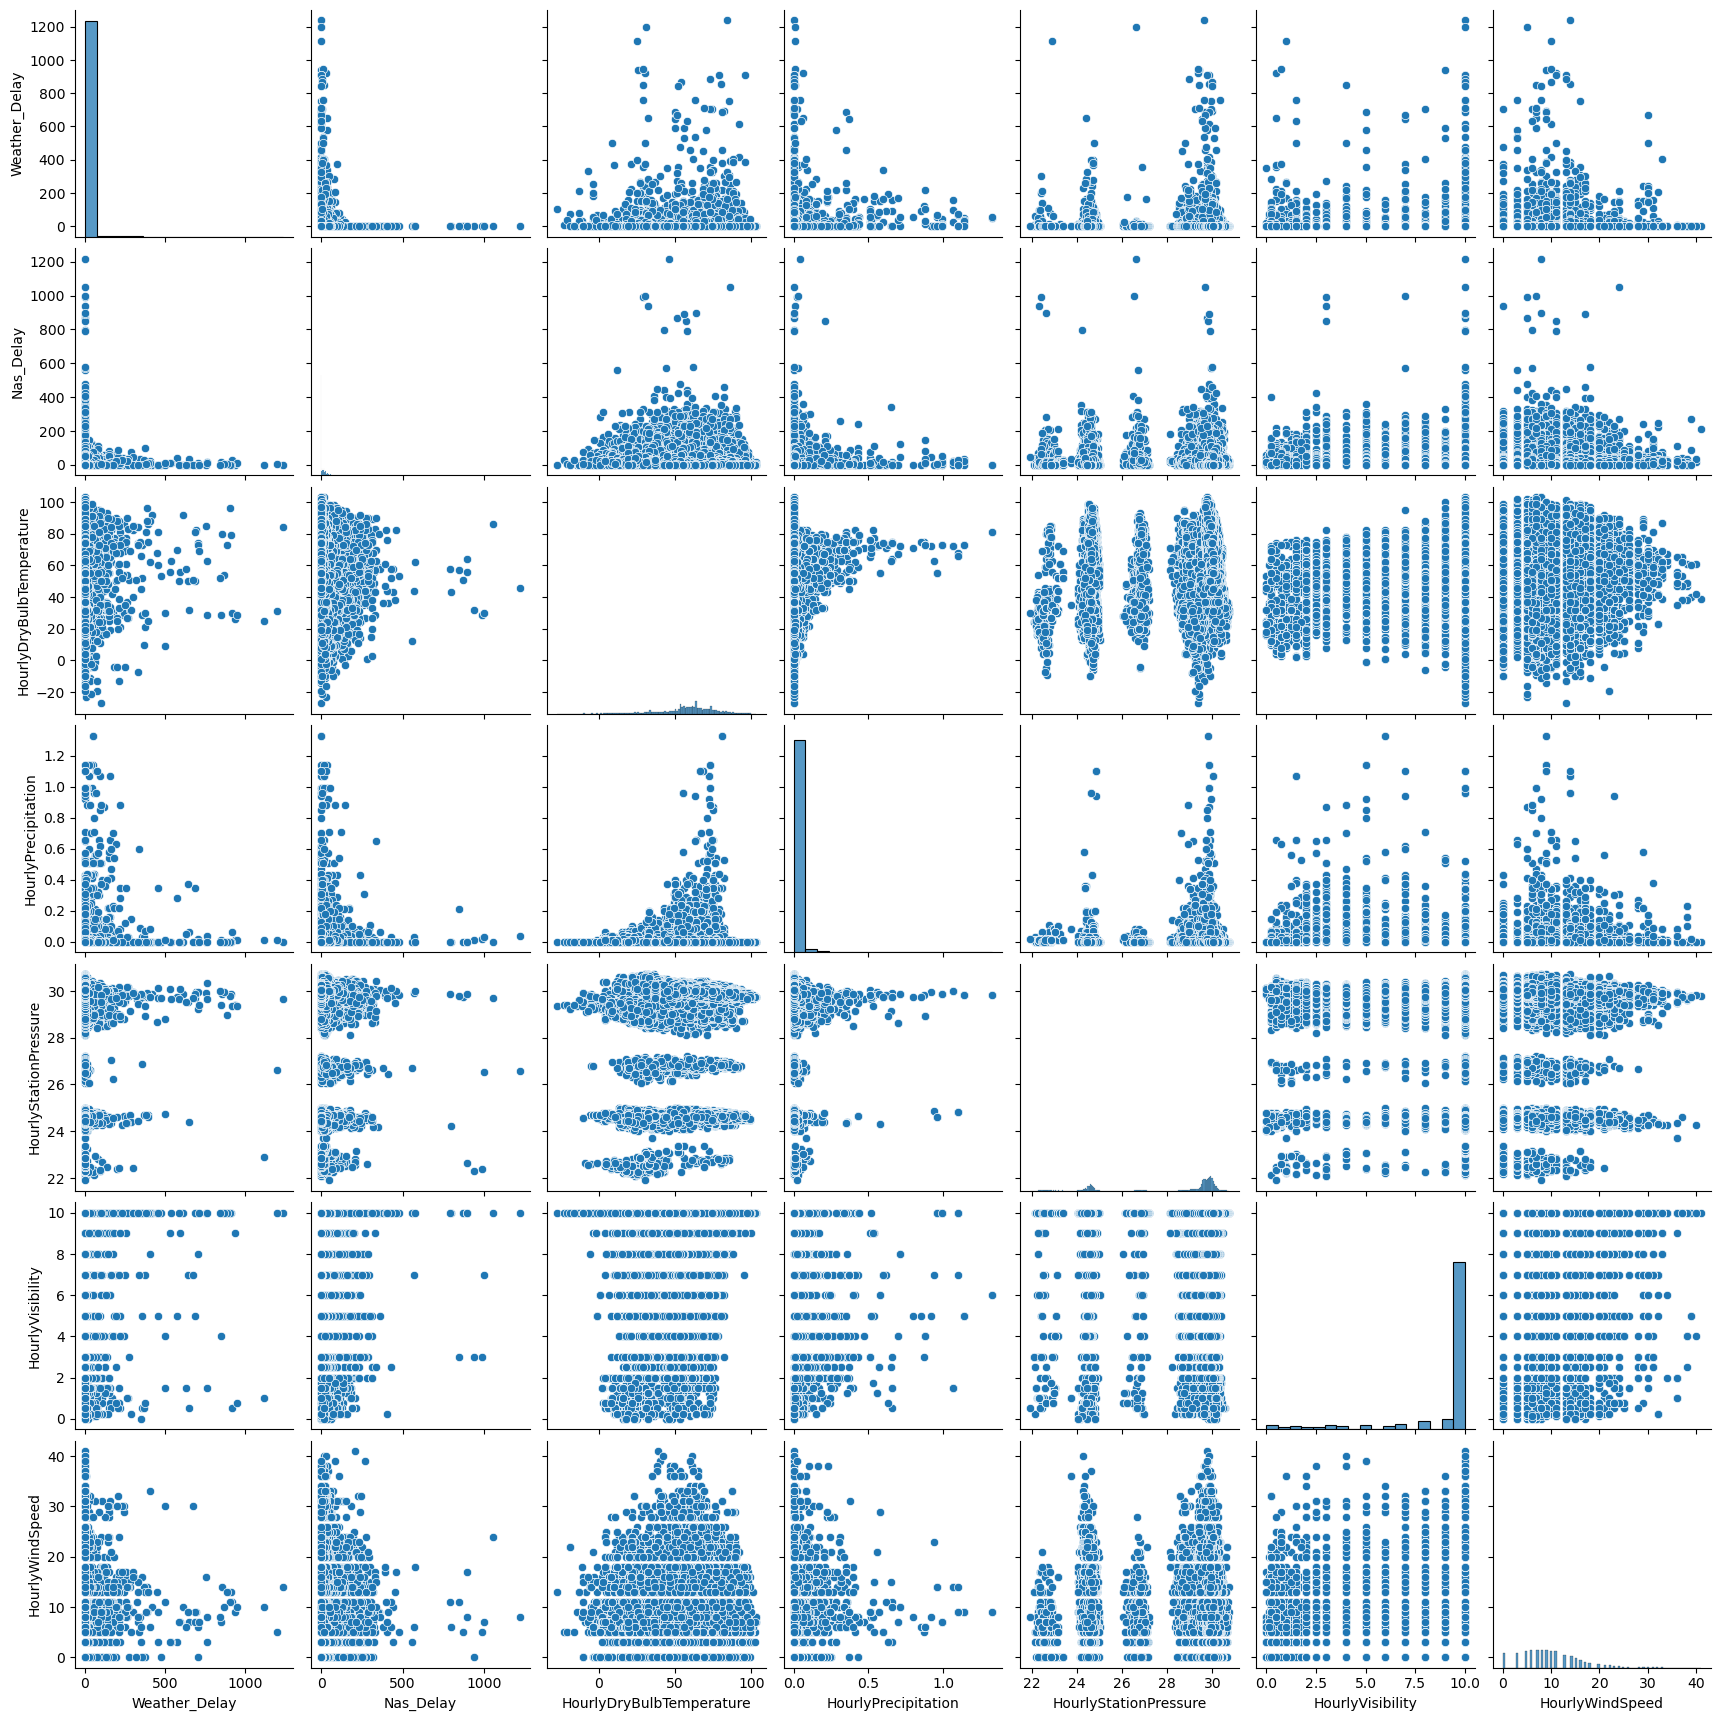

In [44]:
sns.pairplot(data[['Weather_Delay','Nas_Delay','HourlyDryBulbTemperature','HourlyPrecipitation','HourlyStationPressure','HourlyVisibility','HourlyWindSpeed']])

#### Understanding the weather trends over the year

In [45]:
def lineplot(df, x):
    fig, ax = plt.subplots(1,len(x),figsize=(5*len(x),len(x)))
    for i,name in enumerate(x):
        ax[i].plot(df[name],color='blue')
        ax[i].set_title(f"{name}")
        ax[i].set_ylabel('Mean Values')
        plt.xticks(rotation = 90)
    fig.tight_layout()

In [46]:
x = data.groupby(['Month']).agg({'Weather_Delay':['mean'],
                                   'Nas_Delay':['mean'],\
                                   'Dep_Delay':['mean'],\
                                   'HourlyDryBulbTemperature':['mean'],\
                                   'HourlyPrecipitation':['mean'],\
                                   'HourlyVisibility':['mean'],\
                                   'HourlyStationPressure':['mean'],\
                                   'HourlyWindSpeed':['mean']})

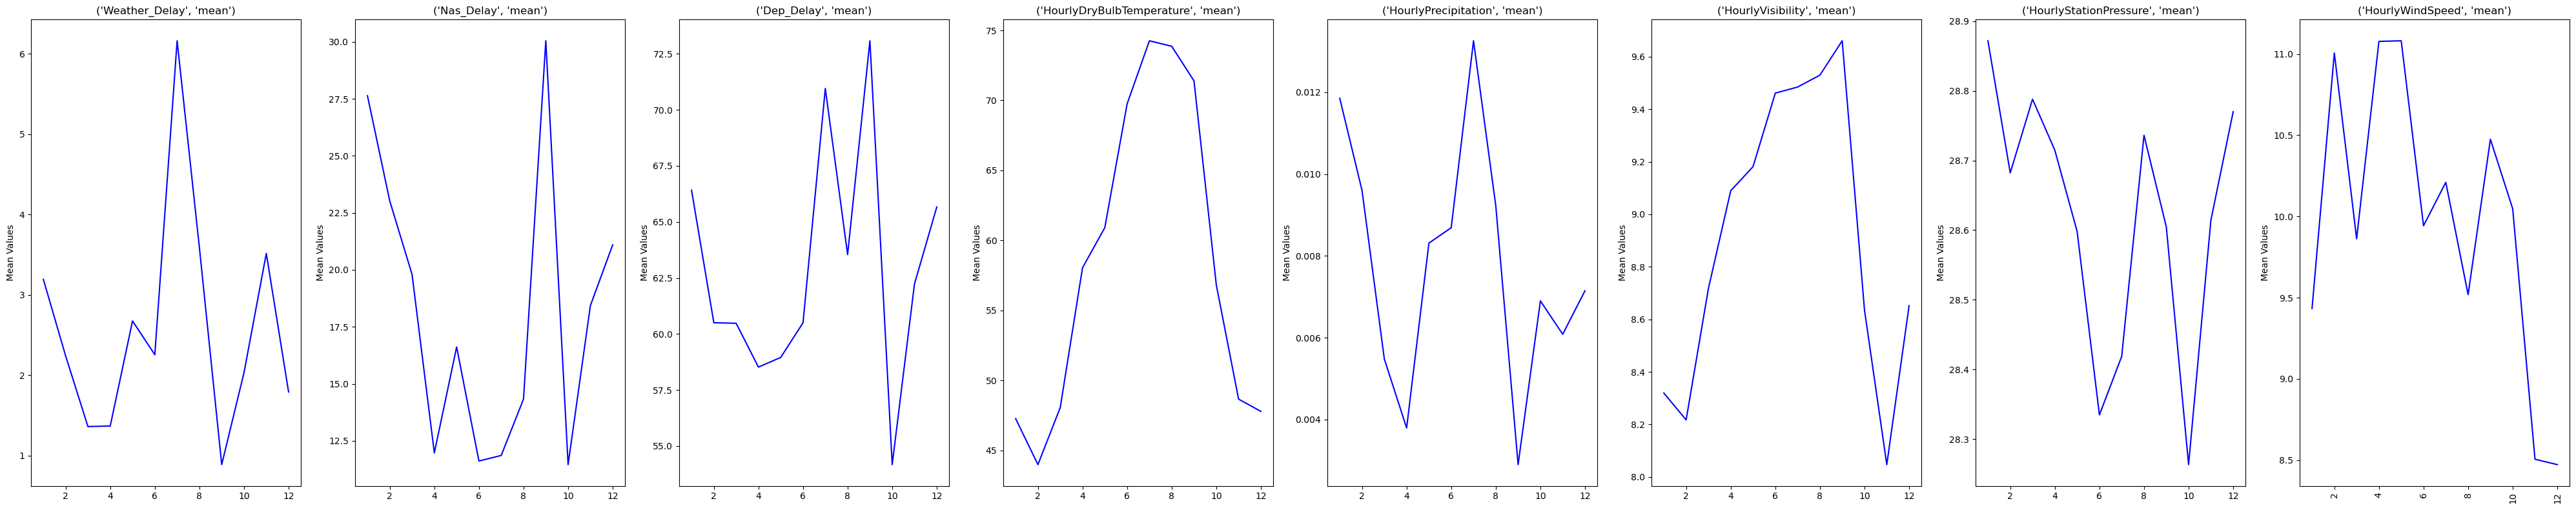

In [47]:
lineplot(x,x.columns)

#### Carrier-wise delays

Text(0, 0.5, 'Mean Values')

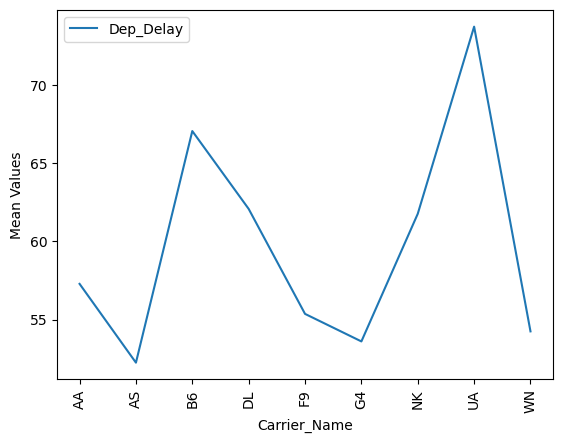

In [48]:
z = data.groupby(['Carrier_Name']).agg({'Dep_Delay':['mean']})
fig2 = sns.lineplot(data = z)
plt.xticks(rotation = 90)
fig2.set_ylabel('Mean Values')

#### Impact of Latitude on weather delays - Considering only original airports

In [49]:
weather = data[data['Weather_Delay']>0]

In [50]:
impact_df = weather[['Origin_Airport','Weather_Delay','Latitude_x','Longitude_x']].groupby(['Origin_Airport','Latitude_x','Longitude_x'], as_index = False).mean()

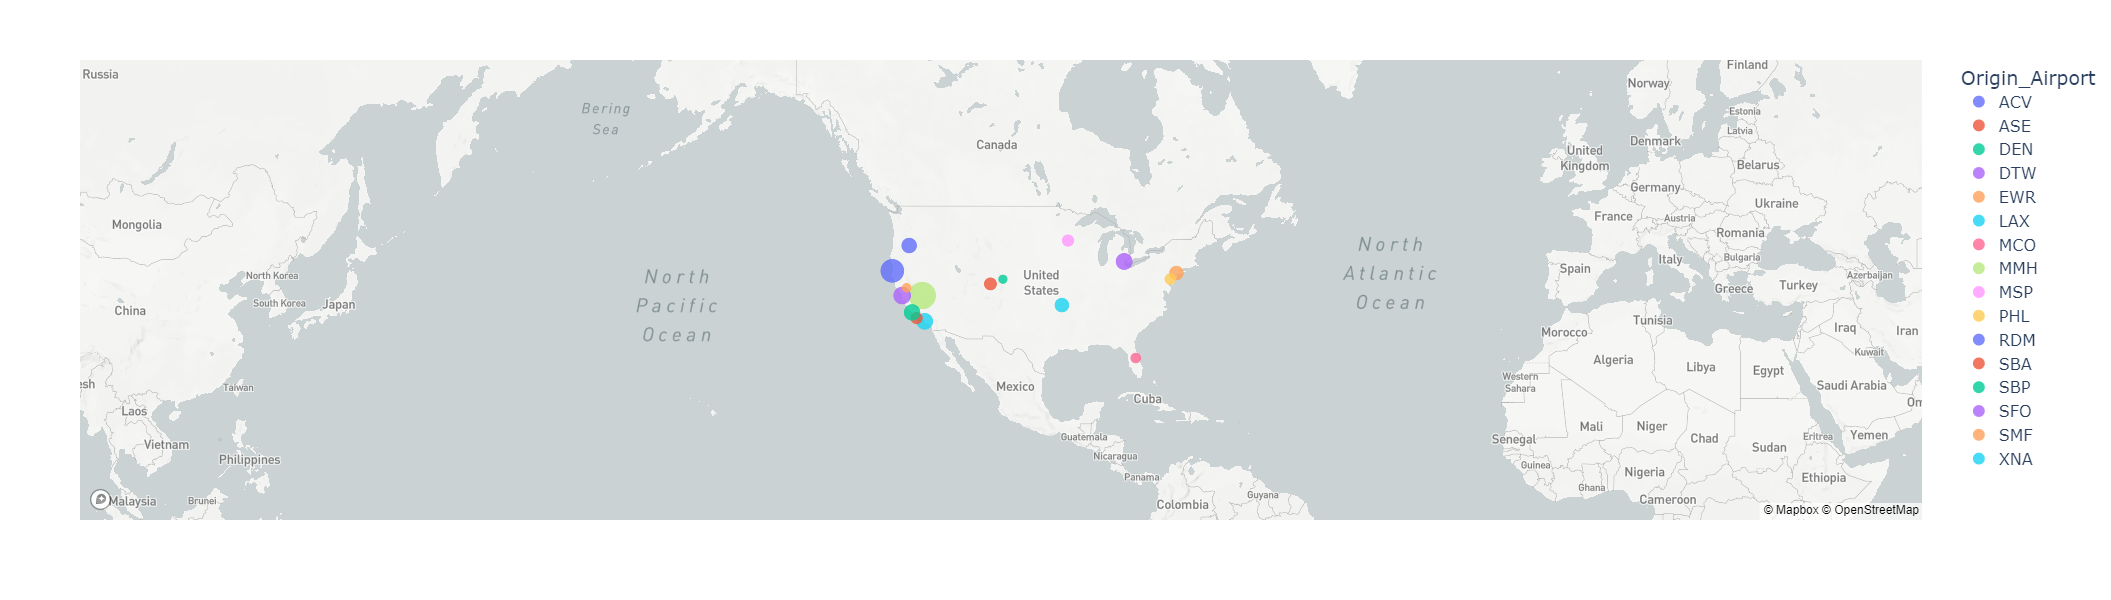

In [51]:
import plotly.express as px
api_token = "pk.eyJ1IjoidmFhcnVuaSIsImEiOiJjbDl4Z2R4a2MwYTV6M3FtcWRydnZqbjBhIn0.LbY_r1J9yaG9gAE6uoyMgg"

fig = px.scatter_mapbox(impact_df,
                        lat= impact_df.Latitude_x,
                        lon= impact_df.Longitude_x,
                        size = "Weather_Delay",
                        color = "Origin_Airport",
                        color_continuous_scale = px.colors.cyclical.HSV,
                        height = 600, 
                        width = 1000,
                        zoom = 2,
                        opacity = 0.8
                       )
fig.update_layout(font_size=16, mapbox_accesstoken = api_token)


#### Weather's share of Delays

In [52]:
test_df = pd.DataFrame(weather[['Month','Weather_Delay']].groupby(['Month']).count())
nas = data[data['Nas_Delay']>0]
test_df = test_df.join(pd.DataFrame(nas[['Month','Nas_Delay']].groupby(['Month']).count()))
car = data[data['Carrier_Delay']>0]
test_df = test_df.join(pd.DataFrame(nas[['Month','Carrier_Delay']].groupby(['Month']).count()))
sec = data[data['Security_Delay']>0]
test_df = test_df.join(pd.DataFrame(nas[['Month','Security_Delay']].groupby(['Month']).count()))
lat = data[data['Late_Aircraft_Delay']>0]
test_df = test_df.join(pd.DataFrame(nas[['Month','Late_Aircraft_Delay']].groupby(['Month']).count()))
test_df = test_df.join(pd.DataFrame(data[['Month','Dep_Delay']].groupby(['Month']).count()))
test_df['56%NAS'] = test_df['Nas_Delay']*0.56
test_df['Nas_Delay'] = test_df['Nas_Delay']*0.44
test_df['Weather_Delay'] = test_df['Weather_Delay']+test_df['56%NAS']
test_df['Weather_Delay'] = test_df['Weather_Delay']/test_df['Dep_Delay']
test_df['Non_Weather_Delay'] = ((test_df['Nas_Delay']+test_df['Carrier_Delay']+test_df['Security_Delay']+test_df['Late_Aircraft_Delay'])/4)/test_df['Dep_Delay']
test_df = test_df[['Weather_Delay','Non_Weather_Delay']]

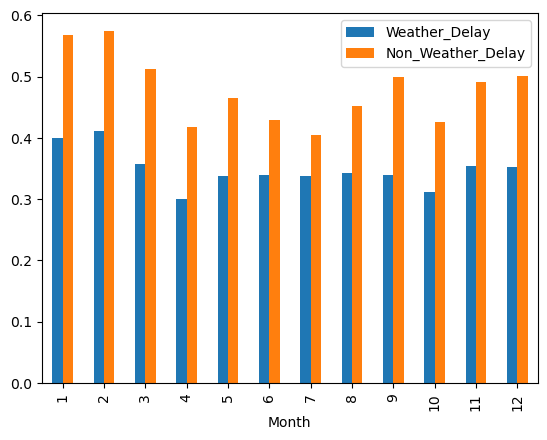

In [53]:
test_df.plot.bar()
plt.show()

**Looking at the graph, we can see that at least 30% of delays are caused by weather in each month**

According to BTS.gov, this number has gone down since. But, the reduction is small.

<a id='P23'></a>
## Step 3:  Identify 1-3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well. 

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.



In [54]:
#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

<a id='P231'></a>
### Research Questions that I found interesting

* How are flight delays correlated to weather conditions?
* Are delayed flights seasonal?
* Study impact of higher latitude on flight delays
* How well can flight delays be predicted purely based on weather?

<a id='Q1'></a>
#### **Addressing the 1st question** 

* Observations and Assumptions
    * With a huge set of data in hand and with few assumptions made, it is tricky to tell whether the delays are correlated to Weather conditions at all
    * The correlations are positive but are negligible
    * The correlation might be higher than it is observed here if Arrival Delay is also considered

<AxesSubplot:>

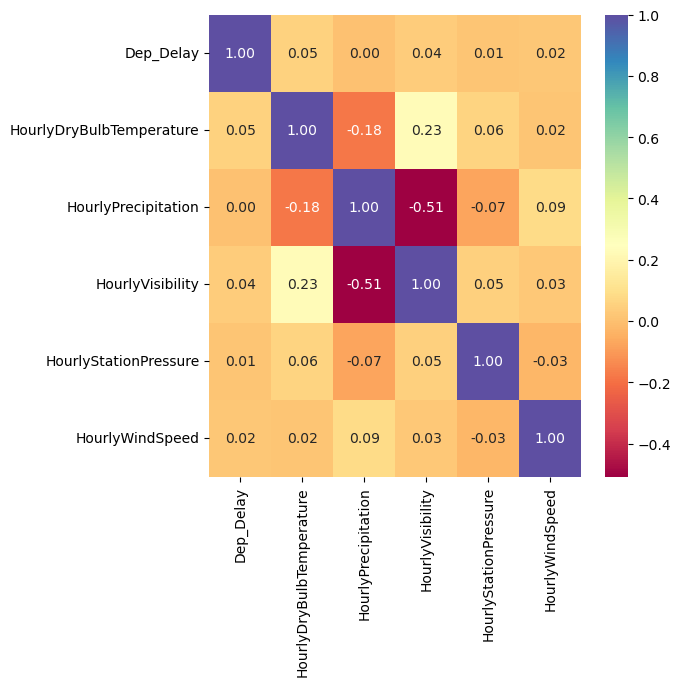

In [55]:
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(data[['Dep_Delay','HourlyDryBulbTemperature','HourlyPrecipitation','HourlyVisibility','HourlyStationPressure','HourlyWindSpeed']].corr('kendall'), cmap = 'Spectral', annot = True, fmt = '0.2f')

<a id='Q2'></a>
#### **Are delayed flights seasonal? Let's find out** 

* Observations and Assumptions
    * Looking at the graph we can clearly tell that there is a common trend every 2 months except October
    * We can assume that due to snow precipitation in Winter months, flight delays are higher
    * September usually has the highest flight delays due to heat waves and high temperatures
    * March, April and May maybe the best months in terms of delays
    * This could be due to the accommadating weather in these months

In [56]:
month_df = data[['Month','Dep_Delay']].groupby(['Month'], as_index = False).mean()

<AxesSubplot:xlabel='Month', ylabel='Dep_Delay'>

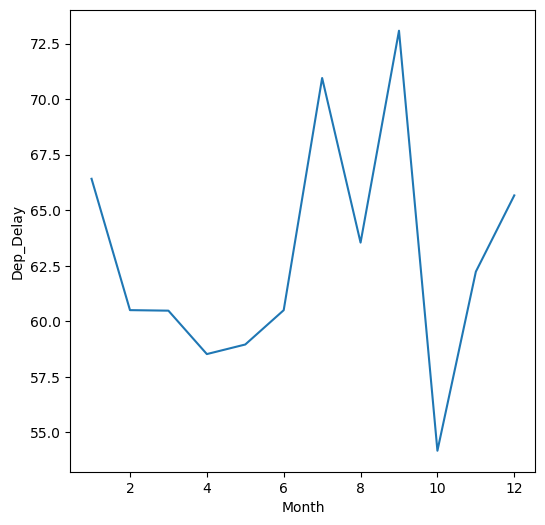

In [57]:
fig, ax = plt.subplots(figsize = (6,6))
sns.lineplot(data = month_df, x = 'Month', y = 'Dep_Delay')

<a id='Q3'></a>
#### **Studying impact of higher latitude on flight delays** 

* Observations and Assumptions
    * Higher the latitude, higher the delay but that is not guaranteed
    * Latitude alone can only tell so much. Factors like proximity to ocean, altitude, longitude and so on need to be taken into account

In [58]:
lat_df = data[['Latitude_x','Dep_Delay']].groupby(['Latitude_x'], as_index = False).mean()

<AxesSubplot:xlabel='Latitude_x', ylabel='Dep_Delay'>

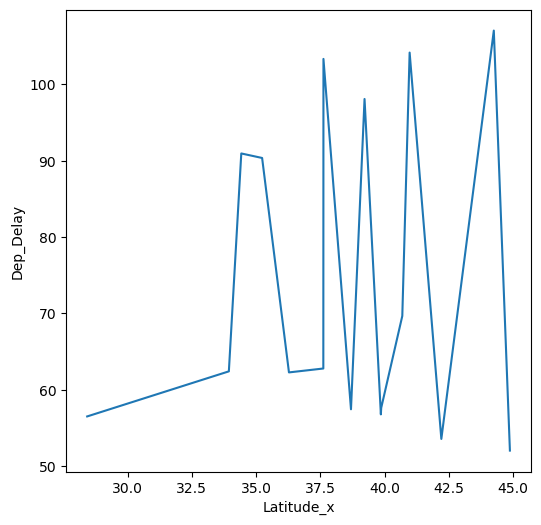

In [59]:
fig, ax = plt.subplots(figsize = (6,6))
sns.lineplot(data = lat_df, x = 'Latitude_x', y = 'Dep_Delay')

<a id='Q4'></a>
#### ***How well can flight delays be predicted purely based on weather?***

##### **Using Regression** - Goal of this method is to predict the amount of time the flight might be delayed due to weather 

* Used three types of Regressions with an assumption that the accuracy would increase

In [60]:
features = ['HourlyDryBulbTemperature','HourlyPrecipitation','HourlyStationPressure','HourlyVisibility','HourlyWindSpeed']
target = ['Weather_Delay']

In [61]:
X_input = data[features]
y_target = data[target].values 

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X_input, y_target, test_size = 0.25, random_state= 200)
#fixing Random state for repeatability

In [63]:
stdScaler = StandardScaler()

In [64]:
stdScaler.fit(x_train)

StandardScaler()

In [65]:
x_scaled = stdScaler.transform(x_train)
x_scaled_test = stdScaler.transform(x_test)

###### **Stochastic Gradient Descent Regressor**

In [66]:
sgdmodel = SGDRegressor(alpha = 0.01, penalty = 'l2')

In [67]:
sgdmodel.fit(x_scaled, y_train)

/home/v1desai/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SGDRegressor(alpha=0.01)

In [68]:
pred_train_sgd = sgdmodel.predict(x_scaled)

In [69]:
r2_score(y_train,pred_train_sgd)

0.01202644222037319

In [70]:
pred_test_sgd = sgdmodel.predict(x_scaled_test)

In [71]:
r2_score(y_test,pred_test_sgd)

0.012049925816348228

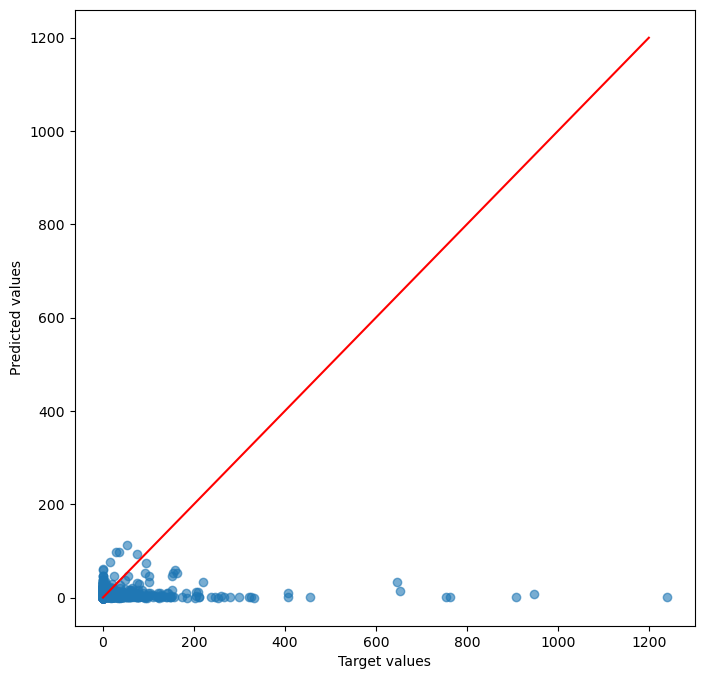

In [72]:
xs = np.linspace(0,1200)

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x = y_test, y = pred_test_sgd, alpha = 0.6)
ax.set_xlabel("Target values")
ax.set_ylabel("Predicted values")
ax.plot(xs,xs, c = 'red')

###### **Ridge Regressor**

In [73]:
mod = Ridge()
mod.fit(x_scaled, y_train)

Ridge()

In [74]:
pred_train = mod.predict(x_scaled)

In [75]:
r2_score(y_train,pred_train)

0.01376272062985473

In [76]:
pred_test = mod.predict(x_scaled_test)

In [77]:
r2_score(y_test,pred_test)

0.014226533412771913

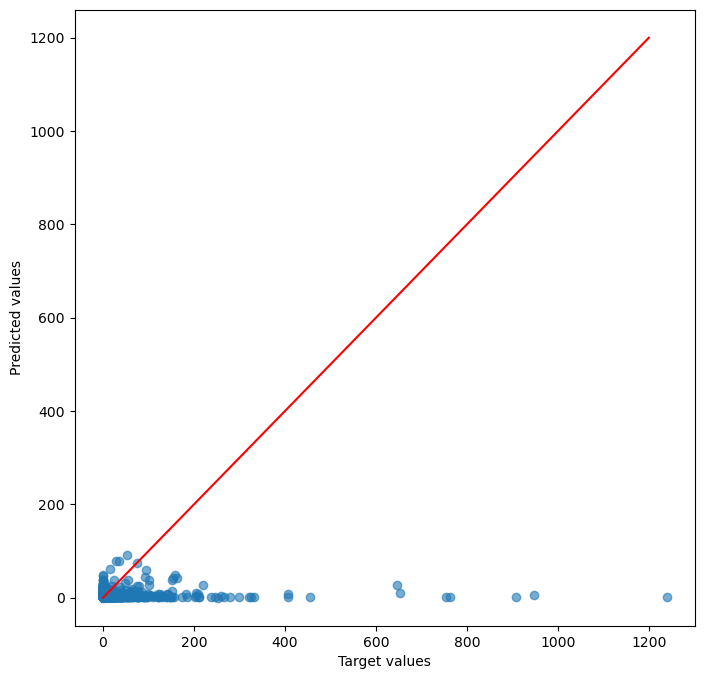

In [78]:
xs = np.linspace(0,1200)

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x = y_test, y = pred_test, alpha = 0.6)
ax.set_xlabel("Target values")
ax.set_ylabel("Predicted values")
ax.plot(xs,xs, c = 'red')

###### **Linear Regressor**

In [79]:
model = LinearRegression()
model.fit(x_scaled, y_train)

LinearRegression()

In [80]:
y_pred_train = model.predict(x_scaled)

In [81]:
r2_score(y_train,y_pred_train)

0.013762720642860438

In [82]:
y_pred_test = model.predict(x_scaled_test)

In [83]:
r2_score(y_test,y_pred_test)

0.014226574468868769

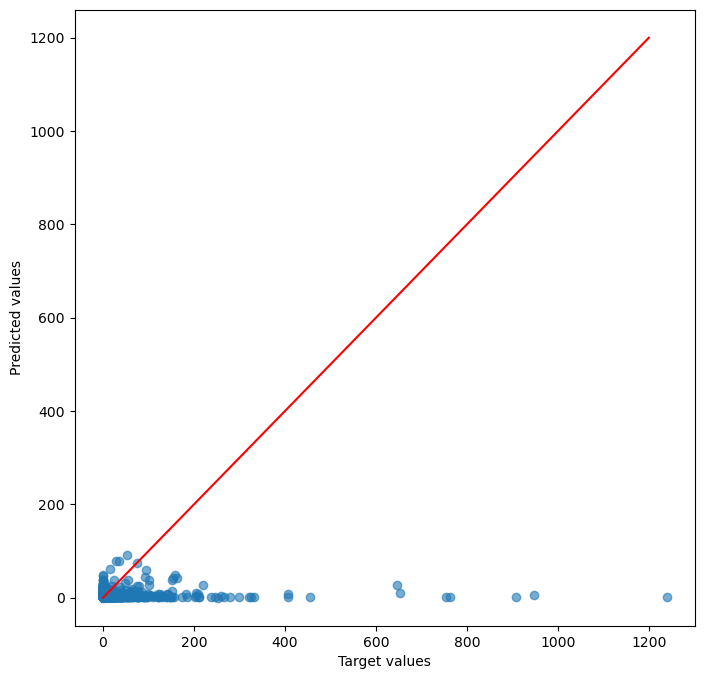

In [84]:
xs = np.linspace(0,1200)

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x = y_test, y = y_pred_test, alpha = 0.6)
ax.set_xlabel("Target values")
ax.set_ylabel("Predicted values")
ax.plot(xs,xs, c = 'red')

##### ***Clearly Regression is not working for the problem we're looking at***

**So, I decided to make this a classification problem**

*Approach*
* Create a weather indicator column with values 0 and 1 where 0 means no weather delay and 1 means weather caused the delay
* Use Support Vector Classifier to fit and predict the result

*Assumptions made*

* All NAS delays exceeding 15 mins are Weather-related delays

In [85]:
weather_filter = data['Weather_Delay']>0
nas_filter = data['Nas_Delay']>15

In [86]:
len(data[weather_filter|nas_filter])

14736

In [87]:
def weather_ind(row):
    if row['Weather_Delay']>0 or row['Nas_Delay']>15:
        return 1
    else:
        return 0

In [88]:
data['Weather_Indicator'] = data.apply(lambda row : weather_ind(row), axis =1)

In [89]:
features = ['HourlyDryBulbTemperature','HourlyPrecipitation','HourlyStationPressure','HourlyVisibility','HourlyWindSpeed']
target = ['Weather_Indicator']

In [90]:
X_input = data[features]
y_target = data[target].values

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X_input, y_target, test_size = 0.25, random_state= 200)
#fixing Random state for repeatability

In [92]:
stdScaler = StandardScaler()

In [93]:
stdScaler.fit(x_train)

StandardScaler()

In [94]:
x_scaled = stdScaler.transform(x_train)
x_scaled_test = stdScaler.transform(x_test)

In [95]:
model = SVC(gamma='auto')
model.fit(x_scaled, y_train)

/home/v1desai/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(gamma='auto')

In [96]:
y_clf_train = model.predict(x_scaled)

In [97]:
accuracy_score(y_train, y_clf_train)

0.6590049952747401

In [ ]:
y_clf_test = model.predict(x_scaled_test)

In [ ]:
accuracy_score(y_test, y_clf_test)

0.6524908869987849

<a id='P24'></a>
## Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?  Use _matplotlib_ visualizations to present these findings.


__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


### EXPAND THIS SECTION TO PRESENT YOUR FINDINGS

**Insights**

* <a href='#Q1'>Flight-Delay - Weather Correlation </a>
    * As seen before, flight delays are barely correlated to weather conditions in this dataset. More hourly weather features might help improve this correlation  
    * Weather_Delay indicates weather delays caused by extreme weather conditions like thunderstorm which can't be avoided. So NAS Delays which are weather - related must be considered
    * Filtering data to be purely weather-delayed is complicated because BTS doesn't inform us about where a NAS Delay is weather related or not
    * Inorder to predict weather delays that happened during the scheduled time, we'll need weather observations at that exact time which is hard to find
    * This analysis is limited flights that fly into top 10 most frequently used California airports
    * FAA.gov says JFK is the most affected by weather. Analysis above might work out for JFK as there might be enough Weather-delayed information
    * This particular project is also aimed at predicting 2019 flight delays as that was the most recent year with records that weren't affected by COVID restrictions



* <a href='#Q2'>Flight-Delays - Seasonal?</a>
    * Flight delays are seasonal
    * Spring seems to be the ideal condition for flights
    * Winter being the worst time to travel
    * This could be due to the number of people travelling and holidays during that season
    * September temperatures are bad for flights too




* <a href='#Q3'>Does Latitude impact delays?</a>
    * Higher Latitudes do affect how delayed the flights are but this cannot be guarenteed. 
    * This particular data doesn't contain information about altitudes of airports and proximity to ocean
    * So, it is hard to definitely say whether Latitude is the only contributing factor
    * According to the map, here(), we can see that delays are more even as the longitude increases
    * This might be an effect of proximity to ocean or just the longitude
    * For Longitude related study, only US data is insufficient



* <a href='#Q4'>Flight delay prediction based purely on weather conditions</a>
    * Based on how regression and classification works, through this project, a person can only tell if a flight will be delayed based purely on weather conditions only 65% of the time
    * In order to exactly tell how many minutes it can be delayed, more reserach is required
    * More weather-related observations and clear specification of delays might help in overcoming this limitation
